<a href="https://colab.research.google.com/github/hazelortegaaa/Summer/blob/main/Final_Project_of_Heart_Attack_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Identify the problem**



#The dataset is publically available and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).




# **Task 2: Load the Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Task 3: Load the Data**


In [ ]:
#heart = pd.read_csv('https://raw.githubusercontent.com/saksham657/Summer-Microcredential/main/heart_attack.csv')

In [ ]:
#heart = pd.read_csv('https://raw.githubusercontent.com/tajrink/data_ml/main/heart_attack%20-%20heart_attack.csv')

In [119]:
heart = pd.read_csv('https://raw.githubusercontent.com/hazelortegaaa/data/main/heart_attack%20-%20heart_attack.csv')

# **Task 4: EDA (Exploratory Data Analysis)**
The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.Each attribute is a potential risk factor.


In [4]:
heart

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3,0,0,0,0,1,0,187,141.0,81.0,24.96,80,81,0
3652,1,68,1,0,0,0,0,1,0,176,168.0,97.0,23.14,60,79,1
3653,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
3654,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0


#Variables
Demographic 

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as 
heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
heart.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              3656 non-null   int64  
 1   age               3656 non-null   int64  
 2   education         3656 non-null   int64  
 3   current_smoker    3656 non-null   int64  
 4   cigs_per_day      3656 non-null   int64  
 5   bp_meds           3656 non-null   int64  
 6   prevalent_stroke  3656 non-null   int64  
 7   prevalent_hyp     3656 non-null   int64  
 8   diabetes          3656 non-null   int64  
 9   tot_chol          3656 non-null   int64  
 10  sys_bp            3656 non-null   float64
 11  dia_bp            3656 non-null   float64
 12  bmi               3656 non-null   float64
 13  heart_rate        3656 non-null   int64  
 14  glucose           3656 non-null   int64  
 15  heart_attack      3656 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 457

In [7]:
heart.describe()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
heart.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol', 'sys_bp',
       'dia_bp', 'bmi', 'heart_rate', 'glucose', 'heart_attack'],
      dtype='object')

In [9]:
heart.isnull().sum()

male                0
age                 0
education           0
current_smoker      0
cigs_per_day        0
bp_meds             0
prevalent_stroke    0
prevalent_hyp       0
diabetes            0
tot_chol            0
sys_bp              0
dia_bp              0
bmi                 0
heart_rate          0
glucose             0
heart_attack        0
dtype: int64

In [10]:
heart.shape

(3656, 16)

#Data wrangling

In [11]:
heart=heart.drop(columns=['education'])

# **Task 5: Data Visualization**


#####In this data visualization we are looking at the glucose of people, we can see thats between 50 to 100 the hightest.Each of these data visualization is what we are focusing on to see how smoking cigarrettes affects people healht and how prove they are likely to have a heart attack.We are focusing mostly on their health and important things we want to focus on such as: glucose, age, heart rate, cigs per day, male, etc.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


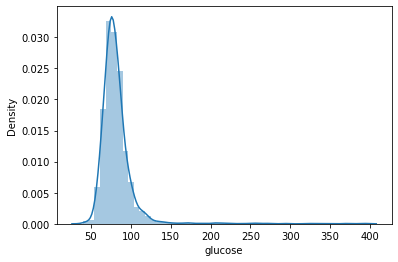

In [12]:
#fig 1 by Hazel 
sns.distplot(heart['glucose'])

####In this graph we can see that we have ages from 35 to 70. However, it increases and decreases between ages.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


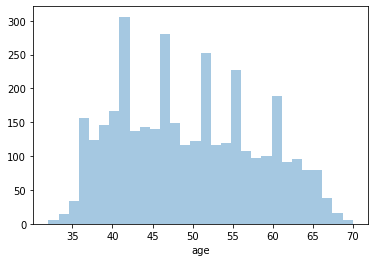

In [13]:
#fig 2 by Hazel
sns.distplot(heart['age'],kde=False,bins=30)

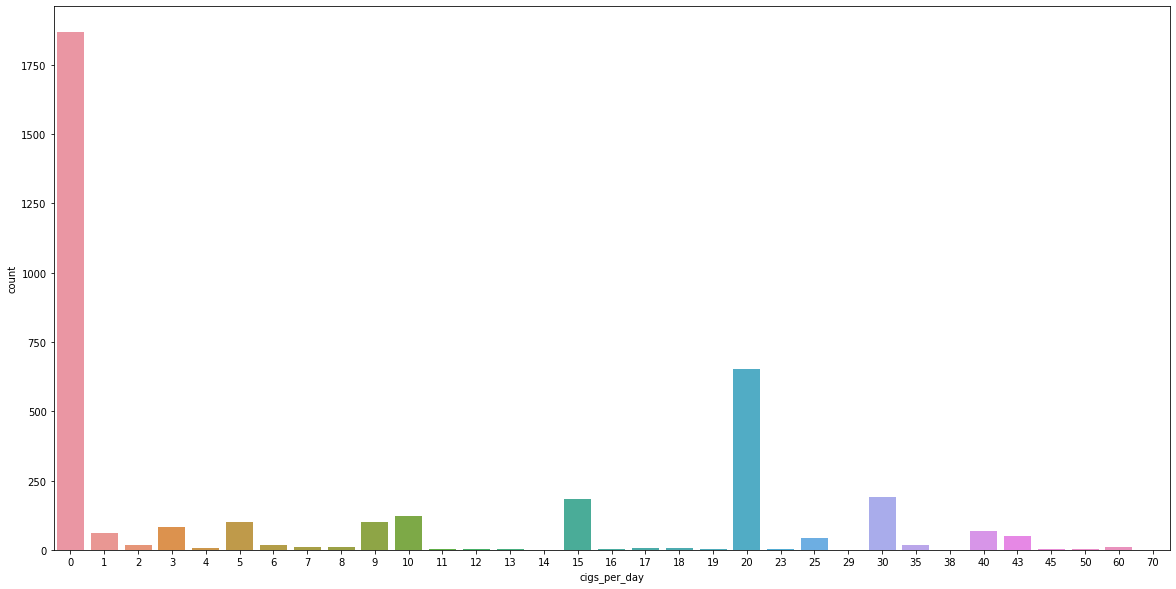

In [115]:
#fig 3 by Hazel:In this graph we can see that we have an estimated of how many cigarrettes people smoke per day. Highest that we found is 43 cigarrettes per day.
#It goes from three, five, nine, ten, fifteen, twenty, thirty, forty and forty-three. 
#This is clearly affecting people day by day because of how much they smoke per day.
plt.figure(figsize=(20,10))
sns.countplot(data = heart, x = 'cigs_per_day')
plt.show()

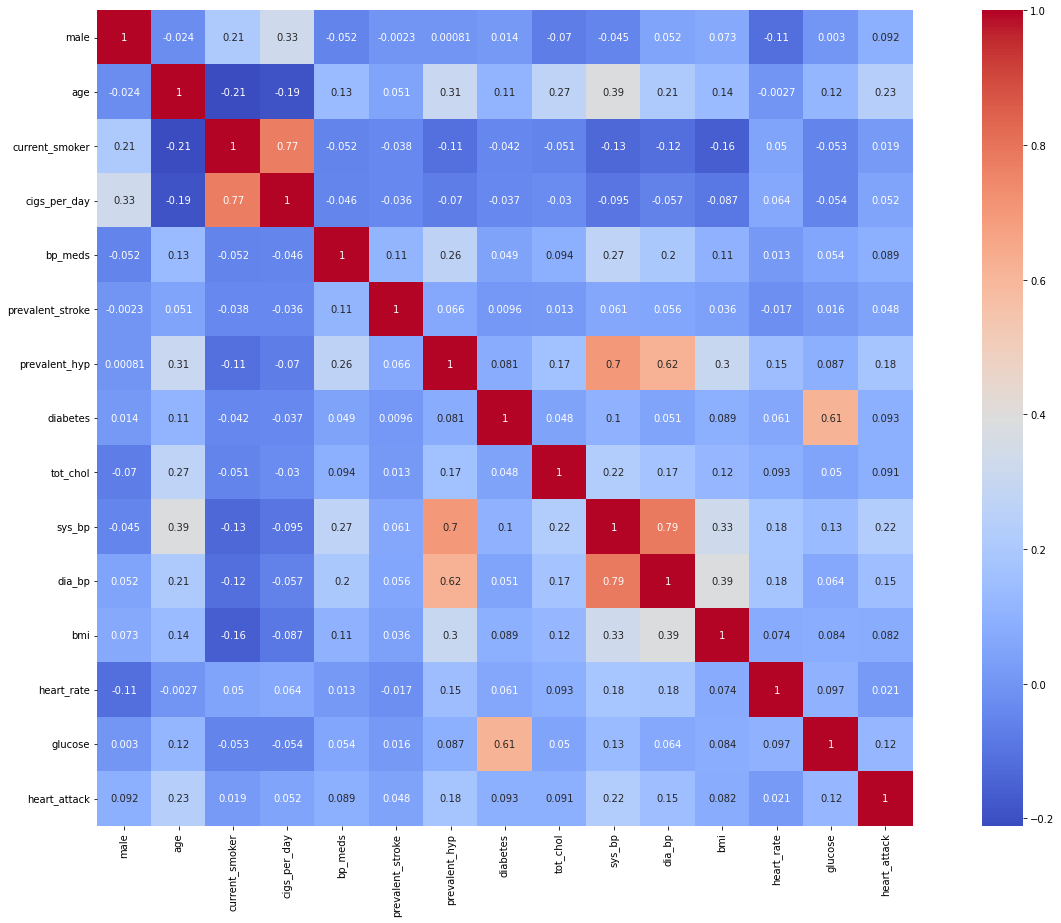

In [116]:
# fig 4 by Hazel:Here, I created a heatwave graph. This is really helpful and organized because it provides all the information from our dataset. 
plt.figure(figsize=(25,15))
sns.heatmap(heart.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

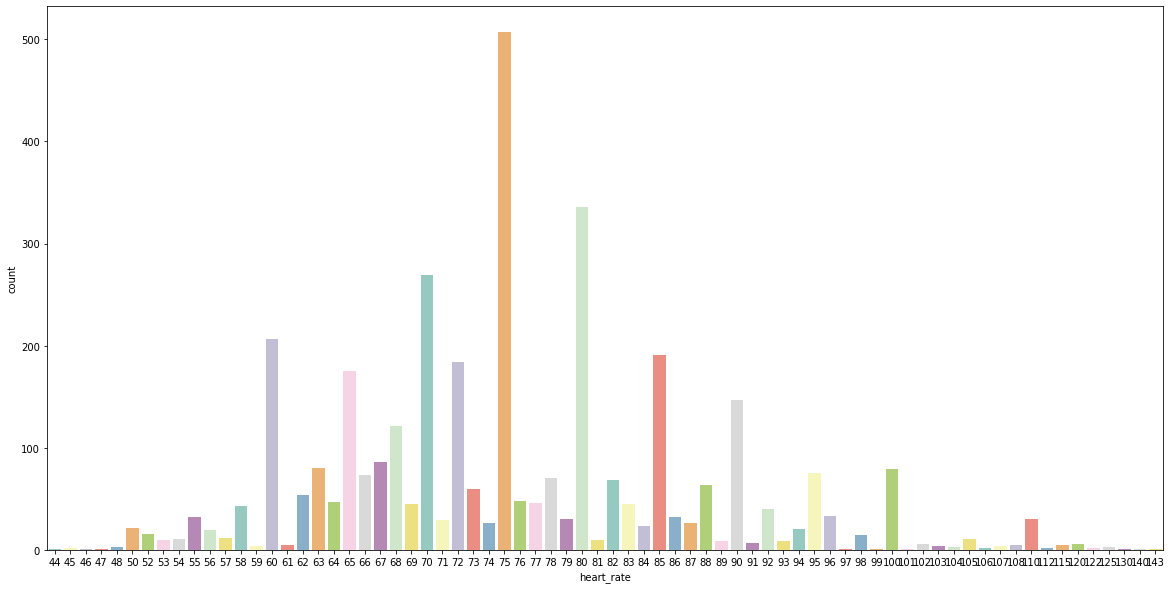

In [117]:
#fig 5 by Hazel:In this graph we can see that males heart rate is between 60 and it increases to highest between 70s. However, it keeps on increasing and decreasing.
plt.figure(figsize=(20,10))
heart = sns.countplot(x="heart_rate", data=heart, palette="Set3")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'male VS current_smoker')

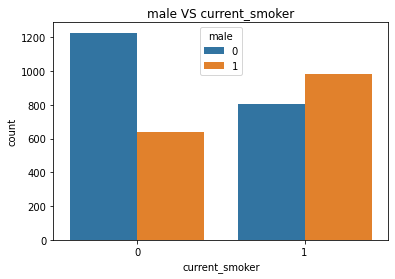

In [120]:
# fig 6 by Tajrin
sns.countplot(heart['current_smoker'], hue = heart['male']).set_title("male VS current_smoker")

In [19]:
##### This is a countplot between the variable male and current smoker.

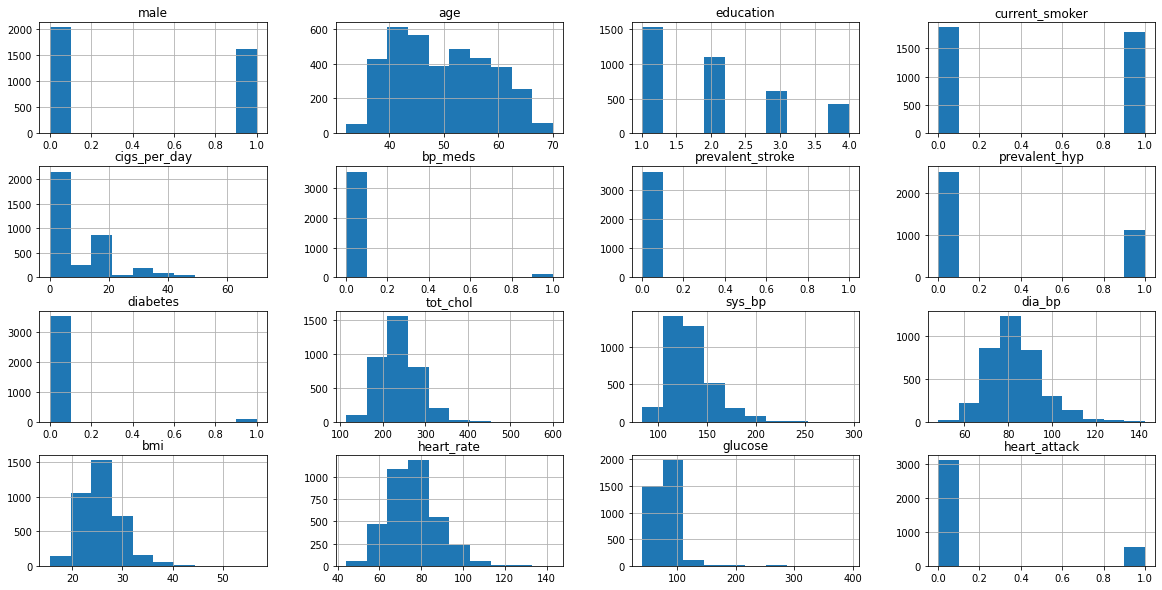

In [121]:
#fig 7 by Tajrin 
heart.hist(figsize=(20,10));

##### this is a histogram plot for all the variables where we can see the higest and lowest point of each and every variables and the range it fall within

# **Task 6: Train Test Split**
(First test, Hazel)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=heart.drop('heart_attack', axis=1)

y=heart['heart_attack']

In [16]:
#Test 1 (Hazel)
#The dataset will be splitted into 70:30 ratio (70% training and 30% testing).
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

#Task 7: **Feature Scaling**

In [17]:
##scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
scaled_x_train=scaler.transform(X_train)

In [19]:
scaled_x_test=scaler.transform(X_test)

In [20]:
### prediction
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
#accuracy
from sklearn.metrics import accuracy_score

# **Task 8: ML Models**

#KNN Model
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems.KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).





In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(X_test)
k= accuracy_score(y_test,pred)
print('With k = 1')
print("\n")
print("confussion matrix")
print(confusion_matrix(y_test,pred))
print("\n")
print("Accuracy of K-NeighborsClassifier:",k*100,'\n')
print(classification_report(y_test,pred))

With k = 1


confussion matrix
[[816 124]
 [126  31]]


Accuracy of K-NeighborsClassifier: 77.2105742935278 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       940
           1       0.20      0.20      0.20       157

    accuracy                           0.77      1097
   macro avg       0.53      0.53      0.53      1097
weighted avg       0.77      0.77      0.77      1097



In [24]:
error_rate=[]

for i in range(1,30):

  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append (np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

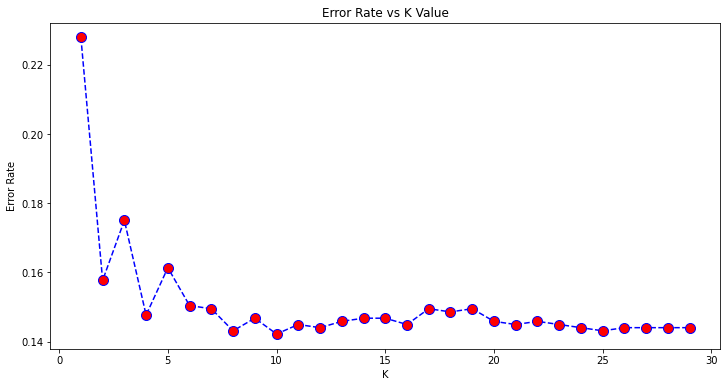

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Minimum error:- 0.1422060164083865 at K = 10


In [27]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
k= accuracy_score(y_test,pred)
print('With k = 12')
print("\n")
print("confussion matrix")
print(confusion_matrix(y_test,pred))
print("\n")
print("Accuracy of K-NeighborsClassifier:",k*100,'\n')
print(classification_report(y_test,pred))

With k = 12


confussion matrix
[[934   6]
 [152   5]]


Accuracy of K-NeighborsClassifier: 85.59708295350957 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       940
           1       0.45      0.03      0.06       157

    accuracy                           0.86      1097
   macro avg       0.66      0.51      0.49      1097
weighted avg       0.80      0.86      0.80      1097



# **Desicion Tree Model**
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
d_pred=dtree.predict(X_test)

In [31]:
d_acc_score=accuracy_score(y_test,d_pred)

In [32]:
print(confusion_matrix(y_test,d_pred))

[[813 127]
 [111  46]]


In [33]:
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       940
           1       0.27      0.29      0.28       157

    accuracy                           0.78      1097
   macro avg       0.57      0.58      0.58      1097
weighted avg       0.79      0.78      0.79      1097



# **Random Forest Model**
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
rfc_pred=rfc.predict(X_test)

In [36]:
rfc_acc_score=accuracy_score(y_test,rfc_pred)

In [37]:
print(confusion_matrix(y_test,rfc_pred))

[[926  14]
 [146  11]]


In [38]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       940
           1       0.44      0.07      0.12       157

    accuracy                           0.85      1097
   macro avg       0.65      0.53      0.52      1097
weighted avg       0.80      0.85      0.81      1097



# **Logistic Model**
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.It is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [41]:
y_pred = logmodel.predict(X_test)

In [42]:
log_acc_score=accuracy_score(y_test,y_pred)

In [43]:
print(confusion_matrix(y_test,y_pred))

[[937   3]
 [150   7]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       940
           1       0.70      0.04      0.08       157

    accuracy                           0.86      1097
   macro avg       0.78      0.52      0.50      1097
weighted avg       0.84      0.86      0.80      1097



# **Support Vector Classifier**
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well

In [45]:
from sklearn.svm import SVC

In [46]:
svc=SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[940   0]
 [157   0]]


Accuracy of Support Vector Classifier: 85.68824065633545 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       940
           1       0.00      0.00      0.00       157

    accuracy                           0.86      1097
   macro avg       0.43      0.50      0.46      1097
weighted avg       0.73      0.86      0.79      1097



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 9: **Accuracy**

In [47]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [log_acc_score*100,
                   rfc_acc_score*100,k*100,d_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.052871
1,Random Forest,85.414768
2,K-Nearest Neighbour,85.597083
3,Decision Tree,78.304467
4,Support Vector Machine,85.688241


# **Graph:**
Graphical represntationof the above accuracy model

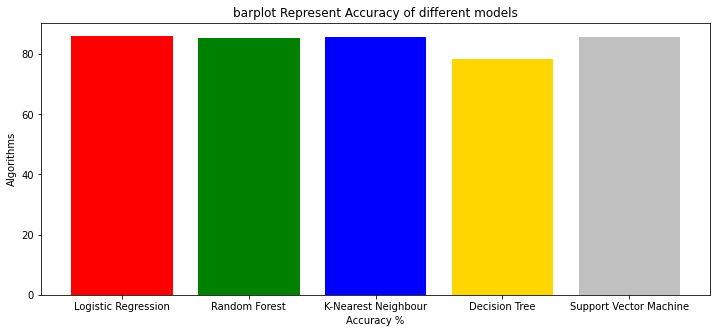

In [48]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

#Task 6: **Second Train Test Split:**
(Second test, Tajrin)

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X=heart.drop('heart_attack', axis=1)
y=heart['heart_attack']

In [50]:
#test2
#The dataset will be splitted into 80:20 ratio (80% training and 20% testing).
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

#Task 7: **Feautre Scaling**

In [52]:
##scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [53]:
scaled_x_train=scaler.transform(X_train)

In [54]:
scaled_x_test=scaler.transform(X_test)

In [55]:
### prediction
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
#accuracy
from sklearn.metrics import accuracy_score

# **Task 8: ML Model**

#KNN Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
pred = knn.predict(X_test)
k= accuracy_score(y_test,pred)
print('With k = 1')
print("\n")
print("confussion matrix")
print(confusion_matrix(y_test,pred))
print("\n")
print("Accuracy of K-NeighborsClassifier:",k*100,'\n')
print(classification_report(y_test,pred))

With k = 1


confussion matrix
[[561  76]
 [ 72  23]]


Accuracy of K-NeighborsClassifier: 79.78142076502732 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       637
           1       0.23      0.24      0.24        95

    accuracy                           0.80       732
   macro avg       0.56      0.56      0.56       732
weighted avg       0.80      0.80      0.80       732



In [59]:
error_rate=[]

for i in range(1,30):

  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append (np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

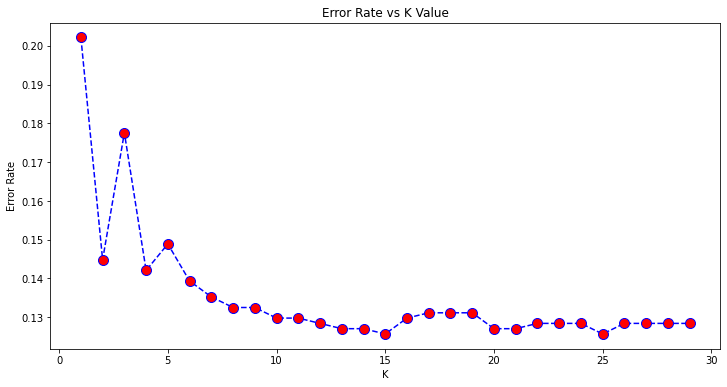

In [60]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Minimum error:- 0.12568306010928962 at K = 15


In [62]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
k= accuracy_score(y_test,pred)
print('With k = 21')
print("\n")
print("confussion matrix")
print(confusion_matrix(y_test,pred))
print("\n")
print("Accuracy of K-NeighborsClassifier:",k*100,'\n')
print(classification_report(y_test,pred))

With k = 21


confussion matrix
[[637   0]
 [ 93   2]]


Accuracy of K-NeighborsClassifier: 87.29508196721312 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       637
           1       1.00      0.02      0.04        95

    accuracy                           0.87       732
   macro avg       0.94      0.51      0.49       732
weighted avg       0.89      0.87      0.82       732



# **Desicion Tree Model**

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
d_pred=dtree.predict(X_test)

In [73]:
d_acc_score=accuracy_score(y_test,d_pred)

In [74]:
print(confusion_matrix(y_test,d_pred))

[[535  95]
 [ 71  31]]


In [75]:
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       630
           1       0.25      0.30      0.27       102

    accuracy                           0.77       732
   macro avg       0.56      0.58      0.57       732
weighted avg       0.79      0.77      0.78       732



# **Random Forest Model:**

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
rfc_pred=rfc.predict(X_test)

In [68]:
rfc_acc_score=accuracy_score(y_test,rfc_pred)

In [69]:
print(confusion_matrix(y_test,rfc_pred))

[[626  11]
 [ 88   7]]


In [70]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       637
           1       0.39      0.07      0.12        95

    accuracy                           0.86       732
   macro avg       0.63      0.53      0.53       732
weighted avg       0.81      0.86      0.82       732



# **Logistic Model**

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [73]:
y_pred = logmodel.predict(X_test)

In [74]:
log_acc_score=accuracy_score(y_test,y_pred)

In [75]:
print(confusion_matrix(y_test,y_pred))

[[634   3]
 [ 94   1]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       637
           1       0.25      0.01      0.02        95

    accuracy                           0.87       732
   macro avg       0.56      0.50      0.47       732
weighted avg       0.79      0.87      0.81       732



# **Support Vector Classifier:**

In [77]:
from sklearn.svm import SVC

In [78]:
svc=SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[637   0]
 [ 94   1]]


Accuracy of Support Vector Classifier: 87.1584699453552 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       637
           1       1.00      0.01      0.02        95

    accuracy                           0.87       732
   macro avg       0.94      0.51      0.48       732
weighted avg       0.89      0.87      0.81       732



# **Task 9:Accuracy**

In [79]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [log_acc_score*100,
                   rfc_acc_score*100,k*100,d_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.748634
1,Random Forest,86.475410
2,K-Nearest Neighbour,87.295082
3,Decision Tree,78.304467
4,Support Vector Machine,87.158470


# **Graph:**
Graphical represntationof the above accuracy model

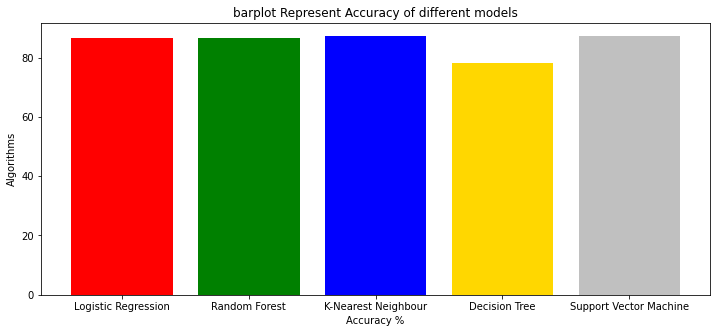

In [80]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

#**Task 6:Third Train Test Split**


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X=heart.drop('heart_attack', axis=1)

y=heart['heart_attack'] 

#### Test 3 (Saksham)
The dataset will be splitted into 50:50 ratio (50% training and 50% testing).


In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.50)

# Task 7:**Feature Scaling**

In [83]:
##scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [84]:
scaled_x_train=scaler.transform(X_train)

In [85]:
scaled_x_test=scaler.transform(X_test)

In [86]:
### prediction
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
#accuracy
from sklearn.metrics import accuracy_score

#Task 8:ML Model

# **KNN Model**

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [89]:
pred = knn.predict(X_test)
k= accuracy_score(y_test,pred)
print('With k = 1')
print("\n")
print("confussion matrix")
print(confusion_matrix(y_test,pred))
print("\n")
print("Accuracy of K-NeighborsClassifier:",k*100,'\n')
print(classification_report(y_test,pred))

With k = 1


confussion matrix
[[561  76]
 [ 72  23]]


Accuracy of K-NeighborsClassifier: 79.78142076502732 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       637
           1       0.23      0.24      0.24        95

    accuracy                           0.80       732
   macro avg       0.56      0.56      0.56       732
weighted avg       0.80      0.80      0.80       732



In [90]:
error_rate=[]

for i in range(1,30):

  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append (np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

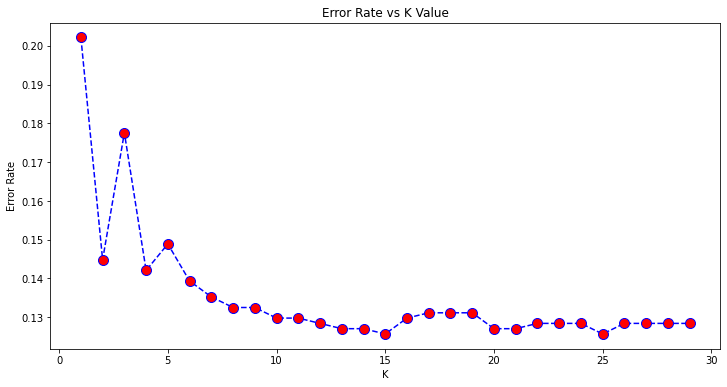

In [91]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [92]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Minimum error:- 0.12568306010928962 at K = 15


In [93]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
k= accuracy_score(y_test,pred)
print('With k = 12')
print("\n")
print("confussion matrix")
print(confusion_matrix(y_test,pred))
print("\n")
print("Accuracy of K-NeighborsClassifier:",k*100,'\n')
print(classification_report(y_test,pred))

With k = 12


confussion matrix
[[636   1]
 [ 93   2]]


Accuracy of K-NeighborsClassifier: 87.1584699453552 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       637
           1       0.67      0.02      0.04        95

    accuracy                           0.87       732
   macro avg       0.77      0.51      0.49       732
weighted avg       0.85      0.87      0.82       732



# **Desicion Tree Model**

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
d_pred=dtree.predict(X_test)

In [97]:
d_acc_score=accuracy_score(y_test,d_pred)

In [98]:
print(confusion_matrix(y_test,d_pred))

[[522 115]
 [ 64  31]]


In [99]:
print(classification_report(y_test,d_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       637
           1       0.21      0.33      0.26        95

    accuracy                           0.76       732
   macro avg       0.55      0.57      0.56       732
weighted avg       0.80      0.76      0.78       732



# **Random Forest Model:**

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
rfc_pred=rfc.predict(X_test)

In [102]:
rfc_acc_score=accuracy_score(y_test,rfc_pred)

In [103]:
print(confusion_matrix(y_test,rfc_pred))

[[629   8]
 [ 88   7]]


In [104]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       637
           1       0.47      0.07      0.13        95

    accuracy                           0.87       732
   macro avg       0.67      0.53      0.53       732
weighted avg       0.82      0.87      0.83       732



# **Logistic Model**

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [110]:
y_pred = logmodel.predict(X_test)

In [109]:
log_acc_score=accuracy_score(y_test,y_pred)

In [108]:
print(confusion_matrix(y_test,y_pred))

[[634   3]
 [ 94   1]]


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       637
           1       0.25      0.01      0.02        95

    accuracy                           0.87       732
   macro avg       0.56      0.50      0.47       732
weighted avg       0.79      0.87      0.81       732



# **Support Vector Classifier:**

In [111]:
from sklearn.svm import SVC

In [112]:
svc=SVC()
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[637   0]
 [ 94   1]]


Accuracy of Support Vector Classifier: 87.1584699453552 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       637
           1       1.00      0.01      0.02        95

    accuracy                           0.87       732
   macro avg       0.94      0.51      0.48       732
weighted avg       0.89      0.87      0.81       732



#Task 9: **Accuracy**

In [113]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [log_acc_score*100,
                   rfc_acc_score*100,k*100,d_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.748634
1,Random Forest,86.885246
2,K-Nearest Neighbour,87.158470
3,Decision Tree,75.546448
4,Support Vector Machine,87.158470


# **Graph:**
Graphical represntationof the above accuracy model

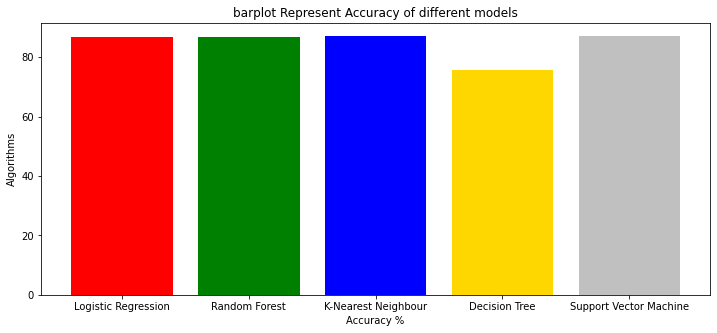

In [114]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## ***Conlusions:***

In [ ]:
#we collaborated on the project to analysize the causes of heart attack .we used various ML algorithm mostly supervised learning models like knn model,logistic model,random forest model,decision tree model and svc moel.
#we have 3 data split per ML algorithm to observe any increase or decrease in the accuracy of the model.
#for the first data split of test size 0.3  we notice that ,there is almost an accuracy of 85% for all the model except decision tree which was about 75%
#for the second data split of test size 0.2  and for the third data split of test size 0.5  it has a similar outcome as the first test split.
#for all three data splits performed over 5 different ML model the highest accuracy was obtained by SVC model wherelse decision tree model gave the lowest accuracy .

# **Team Members:**
Tajrin kashem- contributed in second split test,data visualization fig 6-fig 7.

Hazel Ortega-contributed in first split test,data visualization fig 1-fig 5.

Saksham Sharma-contributed in third split test.

# **Reference:**
 https://www.kaggle.com/code/nareshbhat/eda-classification-ensemble-92-accuracy/data